In [132]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
#import requests
#import time
import scipy.stats as st

In [133]:
# create path to csv files needed
median_detached_homes = pd.read_csv(r"C:\Users\Louie\uci\project1\Median_HSNG_DRAFT.csv")

In [134]:
housing_df = pd.DataFrame(median_detached_homes)
#for row in housing_df.index:
    #print(row, end = " ")
clean_column_rents = housing_df.drop(['Unnamed: 0'],axis=1)
# clean_column_rents2 = clean_column_rents.rename(columns={"county_name     ": "RegionName"})
#housing_f = housing_df.iloc[6:]
clean_column_rents
#print(housing_df.columns.tolist())

,RegionName,location1,location2,1/1/2010,2/1/2010,3/1/2010,4/1/2010,5/1/2010,6/1/2010,7/1/2010,...,1/22/2022,2/22/2022,3/22/2022,4/22/2022,5/22/2022,6/22/2022,7/22/2022,8/22/2022,9/22/2022,10/22/2022
0,Alameda County,Coastal,North,383330,410230,432720,407830,472370,474520,458180,...,1250000,1350000,1430000,1500000,1545000,1420000,1340000,1230000,1240000,1250000
1,Amador County,Inland,North,170000,190000,186000,170000,208330,188000,200000,...,400000,449000,440000,445000,445000,424750,395000,447450,400000,365000
2,Butte County,Inland,North,250000,219230,250000,238000,236760,229464,235710,...,456000,426500,465000,467250,500000,445000,450000,441000,429780,438750
3,Calaveras County,Inland,North,166000,193333,185000,193333,191999,192499,201667,...,467500,510000,492000,504500,525000,495000,459900,464950,450000,414500
4,Contra-Costa County,Coastal,North,274100,278350,287800,298850,308330,326970,318110,...,829000,935000,965900,1050000,1025000,976940,902500,870000,882000,867000
5,Del Norte County,Coastal,North,185000,194999,190000,160000,150000,140000,150000,...,372500,390000,398000,357500,320000,400690,376000,378960,418750,389900
6,El Dorado County,Inland,North,325000,307576,311956,311956,318000,335227,325581,...,607500,730000,750000,711000,728750,715000,650000,631000,647450,684000
7,Fresno County,Inland,Central,145965,152741,150963,148230,157520,161176,150000,...,395500,405000,415000,425000,420000,425000,407000,405000,415000,400000
8,Glenn County,Inland,North,160000,150000,120000,146000,166666,106666,182500,...,332500,412500,320000,281260,417000,325000,360000,327500,327000,310000
9,Humboldt County,Coastal,North,246874,232499,270652,265480,261960,242856,250000,...,425000,452500,430000,464300,458500,435000,480000,465000,460000,439500


In [135]:
print(clean_column_rents.columns.tolist())
#for row in housing_df.index:
    #print(row, end = " ")

['RegionName', 'location1 ', 'location2 ', '1/1/2010', '2/1/2010', '3/1/2010', '4/1/2010', '5/1/2010', '6/1/2010', '7/1/2010', '8/1/2010', '9/1/2010', '10/1/2010', '11/1/2010', '12/1/2010', '1/1/2011', '2/1/2011', '3/1/2011', '4/1/2011', '5/1/2011', '6/1/2011', '7/1/2011', '8/1/2011', '9/1/2011', '10/1/2011', '11/1/2011', '12/1/2011', '1/1/2012', '2/1/2012', '3/1/2012', '4/1/2012', '5/1/2012', '6/1/2012', '7/1/2012', '8/1/2012', '9/1/2012', '10/1/2012', '11/1/2012', '12/1/2012', '1/1/2013', '2/1/2013', '3/1/2013', '4/1/2013', '5/1/2013', '6/1/2013', '7/1/2013', '8/1/2013', '9/1/2013', '10/1/2013', '11/1/2013', '12/1/2013', '1/1/2014', '2/1/2014', '3/1/2014', '4/1/2014', '5/1/2014', '6/1/2014', '7/1/2014', '8/1/2014', '9/1/2014', '10/1/2014', '11/1/2014', '12/1/2014', '1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '1/1/2016', '2/1/2016', '3/1/2016', '4/1/2016', '5/1/2016', '6/1/2016', '7/

In [136]:
housing_drp = clean_column_rents.dropna(how='any')
#housing_drp.to_csv('Median_HSNG_CLEAN_DRAFT.csv')
housing_drp.head()
# for row in housing_drp.index:
#     print(row, end = " ")
#housing_drp2.to_csv('Median_HSNG_DRAFT.csv')

,RegionName,location1,location2,1/1/2010,2/1/2010,3/1/2010,4/1/2010,5/1/2010,6/1/2010,7/1/2010,...,1/22/2022,2/22/2022,3/22/2022,4/22/2022,5/22/2022,6/22/2022,7/22/2022,8/22/2022,9/22/2022,10/22/2022
0,Alameda County,Coastal,North,383330,410230,432720,407830,472370,474520,458180,...,1250000,1350000,1430000,1500000,1545000,1420000,1340000,1230000,1240000,1250000
1,Amador County,Inland,North,170000,190000,186000,170000,208330,188000,200000,...,400000,449000,440000,445000,445000,424750,395000,447450,400000,365000
2,Butte County,Inland,North,250000,219230,250000,238000,236760,229464,235710,...,456000,426500,465000,467250,500000,445000,450000,441000,429780,438750
3,Calaveras County,Inland,North,166000,193333,185000,193333,191999,192499,201667,...,467500,510000,492000,504500,525000,495000,459900,464950,450000,414500
4,Contra-Costa County,Coastal,North,274100,278350,287800,298850,308330,326970,318110,...,829000,935000,965900,1050000,1025000,976940,902500,870000,882000,867000


In [137]:
median_housing_copy = housing_drp.copy()
median_housing_copy1 = median_housing_copy.set_index(['RegionName', 'location1 ', 'location2 '], drop=True)
median_housing_copy1.head()


,,,1/1/2010,2/1/2010,3/1/2010,4/1/2010,5/1/2010,6/1/2010,7/1/2010,8/1/2010,9/1/2010,10/1/2010,...,1/22/2022,2/22/2022,3/22/2022,4/22/2022,5/22/2022,6/22/2022,7/22/2022,8/22/2022,9/22/2022,10/22/2022
RegionName,location1,location2,,,,,,,,,,,,,,,,,,,,,
Alameda County,Coastal,North,383330,410230,432720,407830,472370,474520,458180,440480,424770,444670,...,1250000,1350000,1430000,1500000,1545000,1420000,1340000,1230000,1240000,1250000
Amador County,Inland,North,170000,190000,186000,170000,208330,188000,200000,172500,167500,186670,...,400000,449000,440000,445000,445000,424750,395000,447450,400000,365000
Butte County,Inland,North,250000,219230,250000,238000,236760,229464,235710,243420,225000,244050,...,456000,426500,465000,467250,500000,445000,450000,441000,429780,438750
Calaveras County,Inland,North,166000,193333,185000,193333,191999,192499,201667,203125,172222,194999,...,467500,510000,492000,504500,525000,495000,459900,464950,450000,414500
Contra-Costa County,Coastal,North,274100,278350,287800,298850,308330,326970,318110,313200,310840,289830,...,829000,935000,965900,1050000,1025000,976940,902500,870000,882000,867000


In [138]:
df = pd.DataFrame(median_housing_copy1).astype(float)
housing_tr = df.transpose()
#housing_tr
housing_reset = housing_tr.reset_index()
#housing_reset
housing_year = housing_reset['index'].str.split(pat='/')
#housing_year
rent_year2 = []
housing_year
for x in housing_year:
     rent_year2.append(x[2])

housing_tr['Year'] = rent_year2 
housing_grp =housing_tr.groupby(['Year']).mean()
housing_tr2 = housing_grp.transpose()
housing_tr2.head(10)

,,Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
RegionName,location1,location2,,,,,,,,,,,,,
Alameda County,Coastal,North,432977.500000,399088.333333,430185.833333,568378.333333,649571.666667,719476.666667,772416.666667,851016.666667,926358.333333,911500.000000,1.001272e+06,1.242958e+06,1355500.0
Amador County,Inland,North,179152.500000,159009.166667,170688.333333,210078.333333,223474.166667,261560.000000,268333.333333,318487.500000,327476.666667,324687.500000,3.463667e+05,4.218058e+05,421120.0
Butte County,Inland,North,234213.666667,203447.500000,210170.833333,242872.500000,236838.333333,251029.166667,277053.333333,299033.333333,320112.500000,361633.333333,3.847808e+05,4.344483e+05,451928.0
Calaveras County,Inland,North,188014.750000,162901.583333,163129.666667,205431.833333,236258.416667,256035.000000,284358.333333,309208.333333,321708.333333,339101.666667,3.664092e+05,4.596875e+05,478335.0
Contra-Costa County,Coastal,North,297905.000000,280590.000000,323685.000000,442625.000000,487006.666667,522137.500000,563527.500000,611837.833333,649169.166667,661736.666667,7.370000e+05,9.025417e+05,930334.0
Del Norte County,Coastal,North,155416.583333,176388.666667,162708.083333,143888.750000,162569.416667,194685.000000,214273.333333,213929.166667,230191.666667,261485.833333,2.901000e+05,3.658467e+05,380230.0
El Dorado County,Inland,North,307181.000000,265724.583333,269730.833333,339720.000000,368662.500000,400144.166667,429130.000000,458891.666667,491687.416667,497453.333333,5.291642e+05,6.467200e+05,685470.0
Fresno County,Inland,Central,151024.583333,137831.666667,145905.000000,175670.833333,198376.666667,218543.333333,232954.166667,252503.333333,268630.833333,281920.833333,3.090708e+05,3.672083e+05,411250.0
Glenn County,Inland,North,143069.083333,121743.916667,144784.500000,145472.000000,159930.833333,194141.666667,202668.750000,214000.000000,231484.166667,260375.000000,2.983558e+05,3.208750e+05,341276.0


In [139]:
print(housing_tr2.columns.tolist())

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [140]:
# Calculate the percent change in rent for each county from 2015 to 2019 and add as a column

price_percent_change = ((housing_tr2['2019']) - (housing_tr2['2015'])) / ((housing_tr2['2019']))
housing_tr2['Median Price Change 2015-2019'] = price_percent_change
housing_tr2.head()

,,Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median Price Change 2015-2019
RegionName,location1,location2,,,,,,,,,,,,,,
Alameda County,Coastal,North,432977.500000,399088.333333,430185.833333,568378.333333,649571.666667,719476.666667,772416.666667,851016.666667,926358.333333,911500.000000,1.001272e+06,1.242958e+06,1355500.0,0.210667
Amador County,Inland,North,179152.500000,159009.166667,170688.333333,210078.333333,223474.166667,261560.000000,268333.333333,318487.500000,327476.666667,324687.500000,3.463667e+05,4.218058e+05,421120.0,0.194425
Butte County,Inland,North,234213.666667,203447.500000,210170.833333,242872.500000,236838.333333,251029.166667,277053.333333,299033.333333,320112.500000,361633.333333,3.847808e+05,4.344483e+05,451928.0,0.305846
Calaveras County,Inland,North,188014.750000,162901.583333,163129.666667,205431.833333,236258.416667,256035.000000,284358.333333,309208.333333,321708.333333,339101.666667,3.664092e+05,4.596875e+05,478335.0,0.244961
Contra-Costa County,Coastal,North,297905.000000,280590.000000,323685.000000,442625.000000,487006.666667,522137.500000,563527.500000,611837.833333,649169.166667,661736.666667,7.370000e+05,9.025417e+05,930334.0,0.210959


In [141]:
# Import Cristian's data frame of California population by county.
# Calculate the percent change in population between 2015 and 2019 to match Zillow data
# Merge Cristian's .csv with mine.

merged_pop = pd.read_csv('resources/merged_population2.csv')
merged_pop.head(10)
pop_percent_change = ((merged_pop['2019']) - (merged_pop['2015'])) / ((merged_pop['2019']))
merged_pop['pop change 2015-2019'] = pop_percent_change
merged_pop.rename(columns = {'Unnamed: 1':'RegionName'}, inplace=True)
merged_pop.drop(['county_number', 'region'],axis=1).head()
percent_change_df = pd.merge(housing_tr2, merged_pop, on='RegionName')
change_df = percent_change_df.rename(columns= {'location1_x':'location1',
                                                'location2_x':'location2',
                                                'Median Price Change 2015-2019':'Median Price Change 2015-2019_y'
})
change_df.head()

,RegionName,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,2018_x,...,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,% change 2010-2019,pop change 2015-2019


In [142]:
for row in change_df.index:
     print(row, end = " ")
print(change_df.columns.tolist())

['RegionName', '2010_x', '2011_x', '2012_x', '2013_x', '2014_x', '2015_x', '2016_x', '2017_x', '2018_x', '2019_x', '2020', '2021', '2022', 'Median Price Change 2015-2019_y', 'county_number', 'region', 'location1', 'location2', 'Census', 'Estimates Base', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y', '2017_y', '2018_y', '2019_y', '% change 2010-2019', 'pop change 2015-2019']


In [143]:
change_df2 = change_df[['location1', 'location2', 'RegionName', 'Median Price Change 2015-2019_y', 'pop change 2015-2019', '2019_y']]
rent = change_df2['Median Price Change 2015-2019_y'] * 100
pop = change_df2['pop change 2015-2019'] * 100
change_df2['2019_y'].astype(float)
change_df2.head()

,location1,location2,RegionName,Median Price Change 2015-2019_y,pop change 2015-2019,2019_y


### Cal Counties % change in price v. population 2015 to 2019

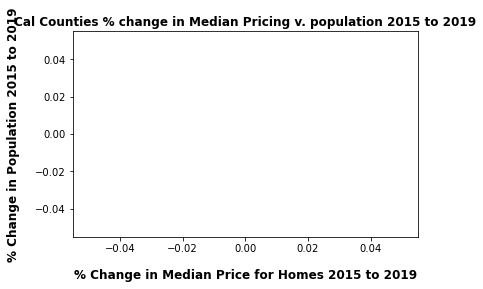

In [144]:
# Create scatter plot charge showing % change in population by % change in rent for 2015 to 2019

N = len(change_df2)
colors = np.random.rand(N)
font = {'weight': 'bold', 'size': '12'}

plt.figure(1)
plt.subplot(111)
plt.ticklabel_format(style='plain')
plt.title('Cal Counties % change in Median Pricing v. population 2015 to 2019', fontdict=font)
plt.xlabel('% Change in Median Price for Homes 2015 to 2019', labelpad=15, fontdict=font)
plt.ylabel('% Change in Population 2015 to 2019', labelpad=15, fontdict=font)
plt.scatter(change_df2['Median Price Change 2015-2019_y'] * 100, change_df2['pop change 2015-2019'] * 100, c=colors, edgecolors='black')
plt.tight_layout()
#plt.savefig('output/rent_scatter.png')
plt.show()

### Cal Counties % change in price v. population 2015 to 2019

In [145]:
# Calculate the r-value and plot on the same scatter chart to see if there is a correlation between the two values.

slope, inter, rvalue, pvalue, stderr = st.linregress(change_df2['Median Price Change 2015-2019_y'] * 100, change_df2['pop change 2015-2019'] * 100)
regress_values = change_df2['Median Price Change 2015-2019_y'] * 100 * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.figure(2)
plt.subplot(111)
plt.ticklabel_format(style='plain')
plt.title('Cal Counties % change in Median Pricing v. population 2015 to 2019', fontdict=font)
plt.xlabel('% Change in Median Pricing for Homes 2015 to 2019', labelpad=15, fontdict=font)
plt.ylabel('% Change in Population 2015 to 2019', labelpad=15, fontdict=font)
plt.scatter(change_df2['Median Price Change 2015-2019_y'] * 100, change_df2['pop change 2015-2019'] * 100, c=colors, edgecolors='black')
plt.plot(change_df2['Median Price Change 2015-2019_y'] * 100, regress_values,'r-')
plt.annotate(line_eq, (20, 1), fontsize=12, color="red")
plt.tight_layout()
#plt.savefig('output/cal_pop_rent_percent_change.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

ValueError: Inputs must not be empty.

In [146]:
# Group the rent data by region
    # Group by Inland/Coastal
    # Group by North/Central/South
# Get the mean of each

mprice_east_west = median_housing_copy1.groupby('location1')
mprice_north_south = median_housing_copy1.groupby('location2')
coastal = mprice_east_west.get_group('Coastal')
inland = mprice_east_west.get_group('Inland')

avg_mprice_east_west = mprice_east_west.mean()
avg_mprice_north_south = mprice_north_south.mean()
avg_mprice_north_south


KeyError: 'location1'

In [147]:
# Transpose the data frame in order to group the data by year for Coastal/Inland chart

trans_avg_mprice = avg_mprice_east_west.transpose()
trans_reset = trans_avg_mprice.reset_index()
date_split = trans_reset['index'].str.split(pat='/')
rent_year = []
for x in date_split:
    rent_year.append(x[2])
new_df = pd.DataFrame([rent_year, trans_avg_mprice['Coastal'], trans_avg_mprice['Inland']])
new_df_tran = new_df.transpose().astype(int)
mprice_chart_df = new_df_tran.rename(columns= {0: 'Year',
                                              1: 'Coastal',
                                              2: 'Inland'
 })
mprice_chart_df.dtypes
mprice_chart_east_west = mprice_chart_df.groupby(mprice_chart_df['Year']).mean()
mprice_chart_east_west

NameError: name 'avg_mprice_east_west' is not defined

In [148]:
# Transpose the data frame in order to group the data by year for North/Central/South chart

trans_avg_mprice2 = avg_mprice_north_south.transpose()
trans_reset2 = trans_avg_mprice2.reset_index()
date_split2 = trans_reset2['index'].str.split(pat='/')
rent_year2 = []
for y in date_split2:
    rent_year2.append(y[2])
new_df2 = pd.DataFrame([rent_year2, trans_avg_mprice2['Central'], trans_avg_mprice2['North'], trans_avg_mprice2['Southern']])
new_df_tran2 = new_df2.transpose().astype(int)
mprice_chart_nor = new_df_tran2.rename(columns= {0: 'Year',
                                              1: 'Central',
                                              2: 'Northern',
                                              3: 'Southern'
 })
mprice_chart_nor.dtypes
mprice_chart_nor_sou = mprice_chart_nor.groupby(mprice_chart_nor['Year']).mean()
mprice_chart_nor_sou

NameError: name 'avg_mprice_north_south' is not defined

### California Median Pricing, Inland v. Coastal, 2015 to 2022

NameError: name 'mprice_chart_east_west' is not defined

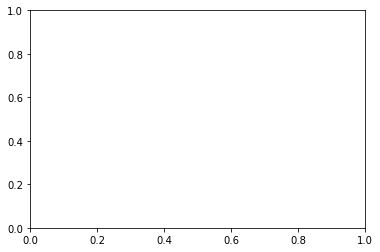

In [149]:
# Create line chart showing change in median rents for coastal vs. inland counties in California for 2015 to 2022

font = {'weight': 'bold', 'size': '15'}
plt.figure(3)
plt.subplot(111)
plt.plot(mprice_chart_east_west)
plt.title('California Median Pricing for Homes, Inland v. Coastal', fontdict= font)
plt.legend(['Coastal', 'Inland'])
plt.xlabel('2015 to 2022', labelpad=15, fontdict= font)
plt.ylabel('Median Price ($)', labelpad=10, fontdict= font)
plt.grid(x)
plt.tight_layout()
#plt.savefig('output/cal_median_price_homes_coast_inland.png')
plt.show()

### California Median Pricing, North/Central/South, 2015 to 2022

NameError: name 'mprice_chart_nor_sou' is not defined

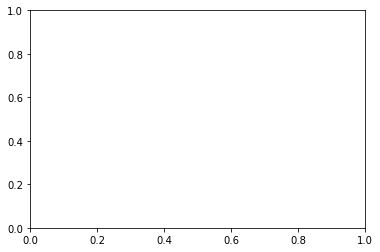

In [150]:
# Create line chart showing change in median rents for Northen vs. Central vs. Southern counties in California for 2015 to 2022

font = {'weight': 'bold', 'size': '15'}
plt.figure(4)
plt.subplot(111)
plt.plot(mprice_chart_nor_sou)
plt.title('California Median Pricing for Homes, North/Central/South', fontdict= font)
plt.legend(['Central', 'Northern', 'Southern'])
plt.xlabel('2015 to 2022', labelpad=15, fontdict= font)
plt.ylabel('Median Prices ($)', labelpad=10, fontdict= font)
plt.grid(x)
plt.tight_layout()
#plt.savefig('output/cal_median_price_homes_2015_to_2019.png')
plt.show()